<a href="https://colab.research.google.com/github/Astmatik001/MEVD002/blob/main/%D0%9C%D0%95%D0%92%D0%94_%D0%9B%D0%A02_24_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly`, `altair`, `bokeh`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn` (альтернативно можно `matplotlib` со стилями из `seaborn`), второй – с помощью `plotly`, `altair` или `bokeh` на выбор студента. Необязательно каждый раз для второго графика выбирать одну и ту же библиотеку, т.к. не все библиотеки располагают одинаковым набором графиков.

# Данные


По [ссылке](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в фонале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [46]:
df = pd.read_csv('song_data.csv')
df.head()

,year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
0,2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5.0
1,2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,NaN
2,2023,Serbia,Luke Black,Samo mi se spava,"Serbian, English",Pop,Male,1,A Major,103,70,56,11,10 dB,4,2,32,5,24.0
3,2023,Latvia,Sudden Lights,Aija,English,Rock,Male,1,A Minor,160,55,56,40,8 dB,5,0,8,7,NaN
4,2023,Portugal,Mimicat,Ai coraçăo,Portuguese,Pop,Female,1,Fs Minor,145,63,66,77,8 dB,31,0,16,5,23.0


In [47]:
columns_to_process = [
  'BPM', 'energy', 'danceability', 'happiness', 'acousticness',
  'instrumentalness', 'liveness', 'speechiness'
]

for col in columns_to_process:
    df[col] = df[col].replace('-', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    df[col] = df[col].astype(float)

df['loudness'] = pd.to_numeric(df['loudness'], errors='coerce')
df['loudness'] = df['loudness'].fillna(0).astype(float)

## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

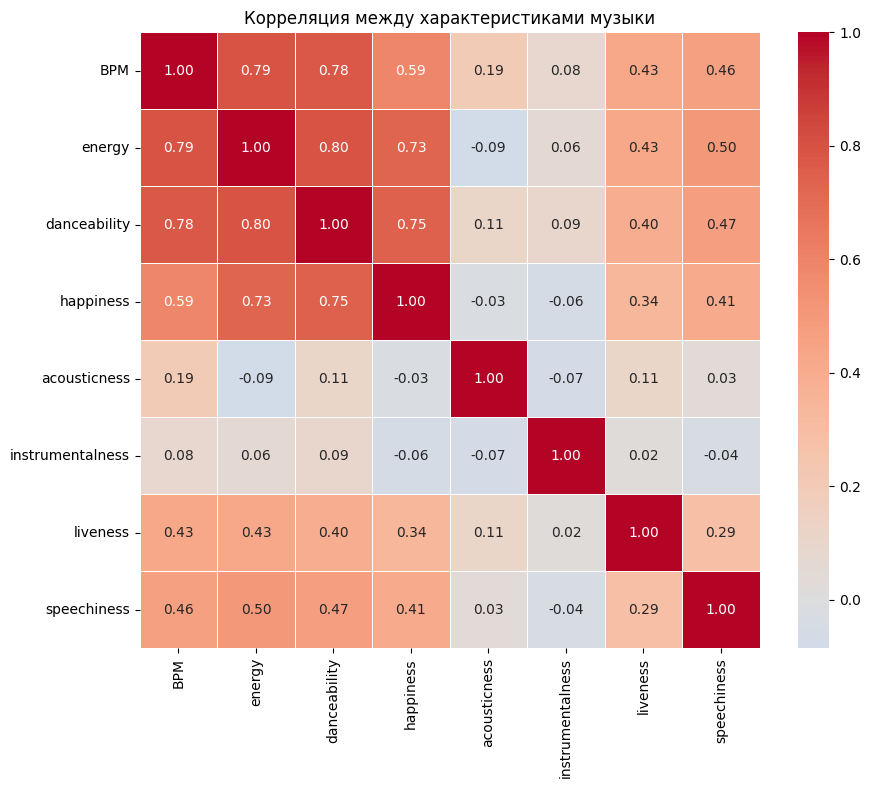

In [48]:
characteristics = ['BPM', 'energy', 'danceability', 'happiness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
correlation_matrix = df[characteristics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, center=0 )
plt.title('Корреляция между характеристиками музыки')
plt.show()

In [49]:
fig = px.imshow(correlation_matrix,
                labels=dict(x="Музыкальные характеристики", y="Музыкальные характеристики", color="Корреляция"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                width=1000,
                height=900,
                text_auto='.2f',
                color_continuous_scale='RdBu_r',
                range_color=[-1, 1])
fig.update_layout(title_text='Корреляция между характеристиками музыки (Plotly)', title_x=0.5)
fig.show()


## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



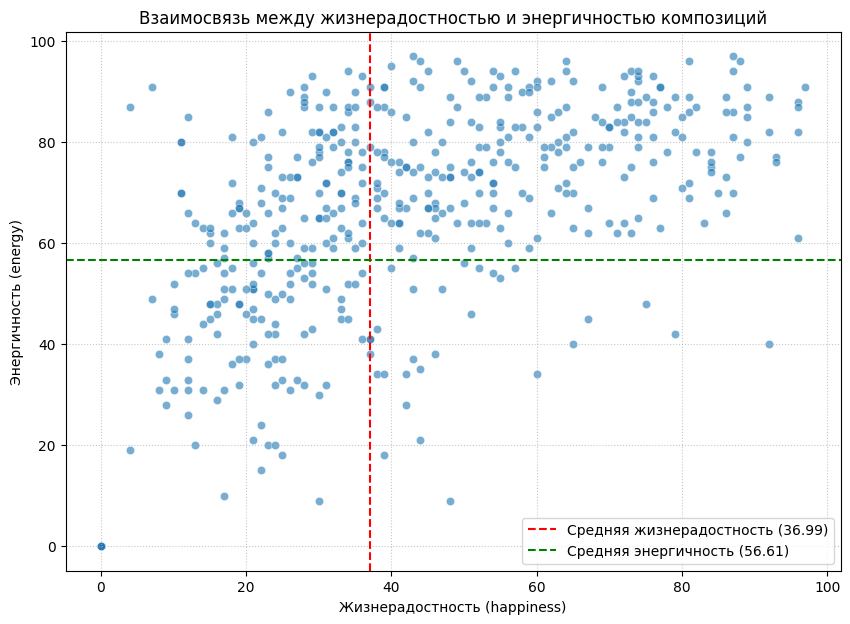

In [50]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='happiness', y='energy', alpha=0.6)

mean_happiness = df['happiness'].mean()
mean_energy = df['energy'].mean()

plt.axvline(mean_happiness, color='r', linestyle='--', label=f'Средняя жизнерадостность ({mean_happiness:.2f})')
plt.axhline(mean_energy, color='g', linestyle='--', label=f'Средняя энергичность ({mean_energy:.2f})')

plt.title('Взаимосвязь между жизнерадостностью и энергичностью композиций')
plt.xlabel('Жизнерадостность (happiness)')
plt.ylabel('Энергичность (energy)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [51]:
mean_happiness = df['happiness'].mean()
mean_energy = df['energy'].mean()

fig = px.scatter(df, x='happiness', y='energy',
                 title='Взаимосвязь между жизнерадостностью и энергичностью композиций (Plotly)',
                 labels={'happiness': 'Жизнерадостность (happiness)', 'energy': 'Энергичность (energy)'},
                 opacity=0.6,
                 width=1000,
                 height=700)

fig.add_shape(type="line",
              x0=mean_happiness, y0=df['energy'].min(), x1=mean_happiness, y1=df['energy'].max(),
              line=dict(color="red", width=2, dash="dash"))
fig.add_annotation(x=mean_happiness, y=df['energy'].max(),
                   text=f'Средняя жизнерадостность ({mean_happiness:.2f})',
                   showarrow=False, yshift=10, font=dict(color="red"))

fig.add_shape(type="line",
              x0=df['happiness'].min(), y0=mean_energy, x1=df['happiness'].max(), y1=mean_energy,
              line=dict(color="green", width=2, dash="dash"))
fig.add_annotation(x=df['happiness'].max(), y=mean_energy,
                   text=f'Средняя энергичность ({mean_energy:.2f})',
                   showarrow=False, xshift=-10, font=dict(color="green"))

fig.show()


## Задание 4

Покажите на горизонтальной столбчатой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

/tmp/ipython-input-3176336442.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




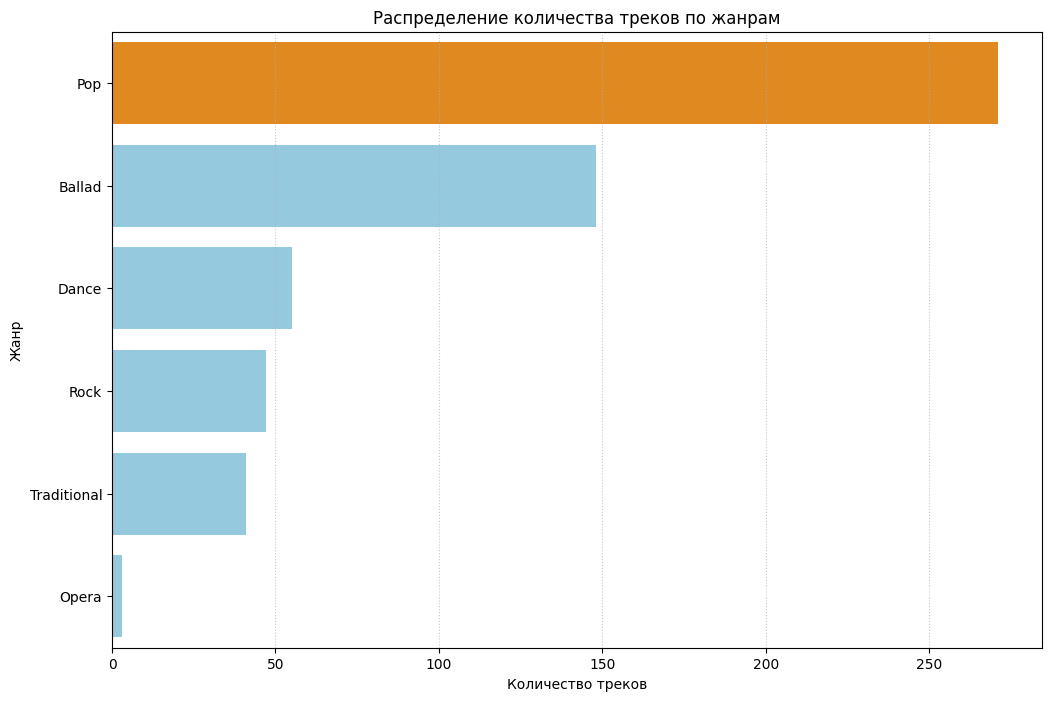

In [52]:
genre_counts = df['style'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

genre_counts = genre_counts.sort_values(by='count', ascending=False)

top_genre = genre_counts.iloc[0]['genre']

colors = ['skyblue' if genre != top_genre else 'darkorange' for genre in genre_counts['genre']]

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=genre_counts, palette=colors)
plt.title('Распределение количества треков по жанрам')
plt.xlabel('Количество треков')
plt.ylabel('Жанр')
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.show()


In [53]:
altair_chart = alt.Chart(genre_counts).mark_bar().encode(
  y=alt.Y('genre:N', sort='-x', title='Жанр'),
  x=alt.X('count:Q', title='Количество треков'),
  color=alt.condition(
    alt.datum.genre == top_genre,
    alt.value('darkorange'),
    alt.value('skyblue')
  ),
  tooltip=['genre', 'count']
).properties(
  title='Распределение количества треков по жанрам (Altair)',
  width=1000,
  height=800,
)

altair_chart.display()

alt.Chart(...)

## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

In [54]:
winners_df = df[df['final_place'] == 1.0]

winning_countries = winners_df.groupby('country').agg(
  wins=('year', 'count'),
  winning_years=('year', lambda x: list(x.unique()))
).reset_index()

winning_countries = winning_countries.sort_values(by='wins', ascending=False)

print(winning_countries.head())

       country  wins       winning_years
9       Sweden     3  [2023, 2015, 2012]
10     Ukraine     2        [2022, 2016]
0      Austria     1              [2014]
2      Denmark     1              [2013]
1   Azerbaijan     1              [2011]


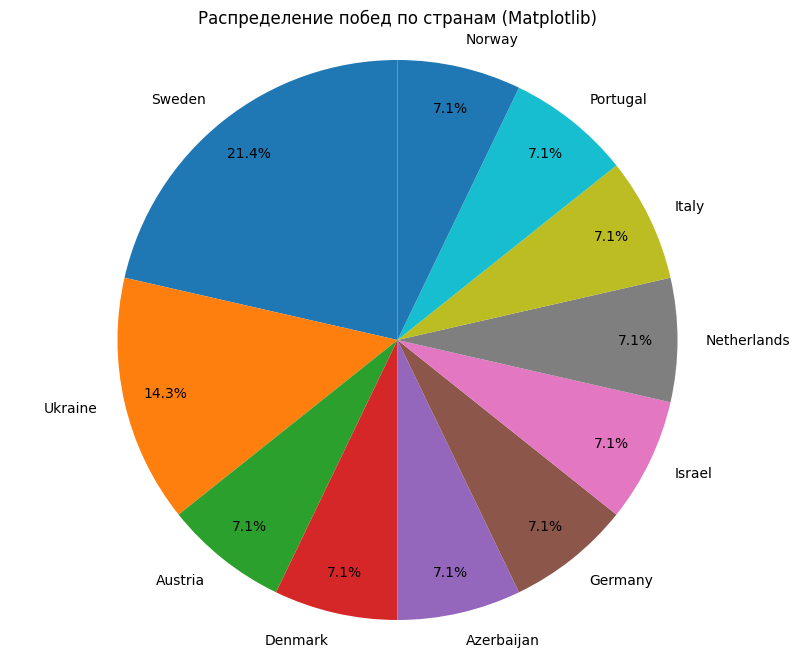

In [55]:
plt.figure(figsize=(10, 8))
plt.pie(winning_countries['wins'],
        labels=winning_countries['country'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85)
plt.title('Распределение побед по странам (Matplotlib)')
plt.axis('equal')
plt.show()

In [56]:
fig = px.pie(winning_countries, values='wins', names='country',
             title='Распределение побед по странам (Plotly)',
             hover_data=['winning_years'],
             labels={'wins': 'Количество побед', 'country': 'Страна'},
             width=1000, height=800)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

In [58]:
gender_counts_by_year = df.groupby(['year', 'gender']).size().reset_index(name='count')

altair_chart = alt.Chart(gender_counts_by_year).mark_bar().encode(
  x=alt.X('year:O', title='Год'),
  y=alt.Y('count:Q', title='Количество участников'),
  color=alt.Color('gender:N', title='Пол', scale=alt.Scale(domain=['Female', 'Male', 'Mix'], range=['lightcoral', 'skyblue', 'lightgreen'])),
  tooltip=['year', 'gender', 'count']
).properties(
  title='Количество мужчин и женщин среди участников по годам (Altair)',
  width=800,
  height=500
).interactive()

altair_chart.display()

alt.Chart(...)

## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

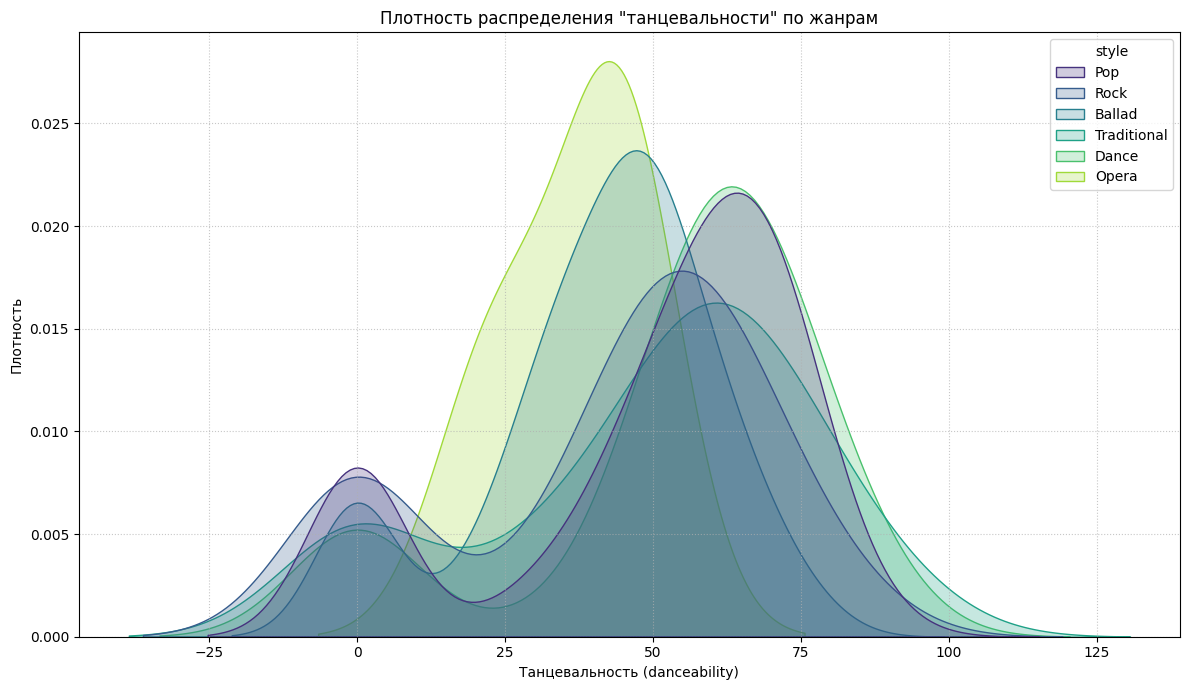

In [71]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x='danceability', hue='style', fill=True, common_norm=False,
            palette='viridis', legend=True)
plt.title('Плотность распределения "танцевальности" по жанрам')
plt.xlabel('Танцевальность (danceability)')
plt.ylabel('Плотность')
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

In [92]:
alt.Chart(df).transform_density(
  'danceability',
  groupby=['style'],
  as_=['danceability', 'density']
).mark_line(
  size=2,
  interpolate='monotone'
).encode(
  x=alt.X('danceability:Q', title='Danceability'),
  y=alt.Y('density:Q', title='Density'),
  color=alt.Color('style:N', legend=alt.Legend(title='Style'))
).properties(
  width=1000,
  height=600
)

alt.Chart(...)

## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

In [ ]:
# PUT YOUR CODE HERE

## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

In [ ]:
# PUT YOUR CODE HERE

## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [ ]:
# PUT YOUR CODE HERE

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).